In [4]:
import matplotlib.pyplot as plt
plt.style.use('rcparams.mplstyle')
import matplotlib as mpl
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
import numpy as np
import os
import pickle
from interpolating_match import find_min_max

This is again far from finished/cleaned up.

In [10]:
# Load data and get min max lines
with open(os.path.join('..', 'EccentricBinaries', 'notebooks', 'grid_data', 'dataslot_3', 'all_matches'), 'rb') as fp:
        grid_data_20_30_5 = pickle.load(fp)
grid_data_20_30_5 = find_min_max(grid_data_20_30_5)
param_vals=np.linspace(0,0.2,101)

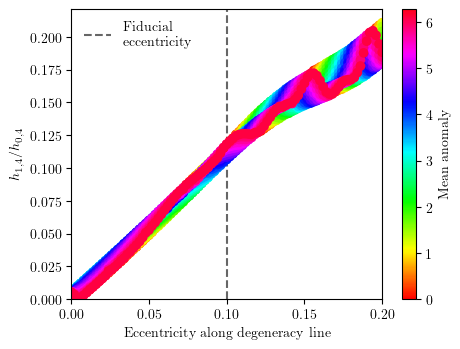

In [50]:
# Plot individual points
plt.figure(figsize=(0.75*6.4,0.75*4.8))
MA_points = len(grid_data_20_30_5[30]['h2_h1'].T)
for i, MA_line in enumerate(grid_data_20_30_5[30]['h2_h1'].T):
    plt.scatter(param_vals, MA_line, c=np.full(len(MA_line), i*2*np.pi/MA_points), cmap='hsv', vmin=0, vmax=2*np.pi)
plt.colorbar(label='Mean anomaly')
plt.xlim(0, 0.2)
plt.ylim(0,)
ylims = plt.gca().get_ylim()
plt.axvline(0.1, c='k', ls='dashed', alpha=0.6, label='Fiducial\neccentricity', zorder=-5)
plt.legend(frameon=False)
plt.xlabel('Eccentricity along degeneracy line')
plt.ylabel('$h_{1,4}$/$h_{0,4}$')
plt.tight_layout()
plt.savefig('Figures/min_max_points.png', dpi=1000)

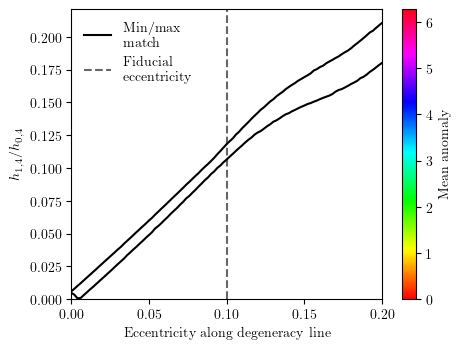

In [51]:
# Plot min/max lines
plt.figure(figsize=(0.75*6.4,0.75*4.8))
MA_points = len(grid_data_20_30_5[30]['h2_h1'].T)
for i, MA_line in enumerate(grid_data_20_30_5[30]['h2_h1'].T):
    plt.scatter(param_vals, MA_line+1, c=np.full(len(MA_line), i*2*np.pi/MA_points), cmap='hsv', vmin=0, vmax=2*np.pi)
plt.plot(param_vals, grid_data_20_30_5[30]['h2_h1_max'], c='k', label='Min/max\nmatch')
plt.plot(param_vals, grid_data_20_30_5[30]['h2_h1_min'], c='k')
plt.colorbar(label='Mean anomaly')
plt.xlim(0, 0.2)
plt.ylim(ylims)
plt.axvline(0.1, c='k', ls='dashed', alpha=0.6, label='Fiducial\neccentricity', zorder=-5)
plt.legend(frameon=False)
plt.xlabel('Eccentricity along degeneracy line')
plt.ylabel('$h_{1,4}$/$h_{0,4}$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines.png', dpi=1000)